# Modulo 5 Capstone Project
## Ana Vanessa López Monge

# Project Description

El proyecto tiene como objetivo analizar los datos de una campaña de marketing de un banco Portugues y predecir si el cliente aceptará o no un deposito a plazo. De esta manera, la tecnología permite repensar las estrategias de marketing al enfocarse en maximizar el valor del cliente a través de la evaluación de la información disponible y las métricas del cliente, lo que permite construir relaciones más largas y más estrictas en alineación con la demanda comercial. 

En este código realizamos depuración de la información, análisis descriptivo y gráfico preliminar y entrenamiento y testeo de modelos predictivos mediante el uso de diferentes algoritmos de clasificación.


# Libraries Import

In [349]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from matplotlib import pylab
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy import stats
import researchpy as rp
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare_allpairs
import researchpy

# Estimators Definition

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import RFE

# Model Metrics and Cross Validation 

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Dataset Upload

Este estudio considera datos reales recopilados de un banco minorista portugués, de mayo de 2008 a junio de 2013, en un total de 41188 contactos telefónicos. El conjunto de datos no está equilibrado, ya que solo 11,3% de los registros están relacionados con los éxitos.

In [9]:
bankData = pd.read_excel('bankdata.xlsx', header =0)
bankData1= bankData.copy()

# General Visualizations

Se realizan visualizaciones iniciales de la composición de la data y estadistica descriptiva para aquellas variables numericas. El conjunto de datos está compuesto por un total de 41188 registros y 21 variables.

In [10]:
bankData.head() #Para visualiazar el numero de atributos

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,...,campaign,pdays,previous,poutcome,empVarRate,consPriceIdx,consConfIdx,euribor3m,nrEmployed,fixedTermDeposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
bankData.describe() #Para visualizar estadistica descriptiva de la data

,age,duration,campaign,pdays,previous,empVarRate,consPriceIdx,consConfIdx,euribor3m,nrEmployed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
bankData.info() #Tipo de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age                 41188 non-null int64
job                 41188 non-null object
marital             41188 non-null object
education           41188 non-null object
default             41188 non-null object
housing             41188 non-null object
loan                41188 non-null object
contact             41188 non-null object
month               41188 non-null object
dayOfWeek           41188 non-null object
duration            41188 non-null int64
campaign            41188 non-null int64
pdays               41188 non-null int64
previous            41188 non-null int64
poutcome            41188 non-null object
empVarRate          41188 non-null float64
consPriceIdx        41188 non-null float64
consConfIdx         41188 non-null float64
euribor3m           41188 non-null float64
nrEmployed          41188 non-null float64
fixedTermDeposit    41188 non-null object
dtypes: f

In [13]:
bankData.isna().sum() #Resumen de los NA por columna

age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
dayOfWeek           0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
empVarRate          0
consPriceIdx        0
consConfIdx         0
euribor3m           0
nrEmployed          0
fixedTermDeposit    0
dtype: int64

In [14]:
print(bankData.shape) #Visualizar el número de observaciones y atributos

(41188, 21)


# Data Preparation

Se realiza la depuración de la data, agrupación de data por rangos para facilitar la visualización grafica y creación de variables dummies para los modelos predictivos

In [15]:
#Modificar tipo de variables
bankData1['marital'] = pd.Categorical(bankData1.marital)
bankData1['education'] = pd.Categorical(bankData1.education)
bankData1['housing'] = pd.Categorical(bankData1.housing)
bankData1['loan'] = pd.Categorical(bankData1.loan)
bankData1['contact'] = pd.Categorical(bankData1.contact)
bankData1['month'] = pd.Categorical(bankData1.month)
bankData1['dayOfWeek'] = pd.Categorical(bankData1.dayOfWeek)
bankData1['poutcome'] = pd.Categorical(bankData1.poutcome)
bankData1['fixedTermDeposit'] = pd.Categorical(bankData1.fixedTermDeposit)
bankData1['job'] = pd.Categorical(bankData1.job)
bankData1['default'] = pd.Categorical(bankData1.default)

In [16]:
#Realizando intervalos para la variable edad y duracion de la llamada
#Rangos por edades
binsAge = [15,20,30,40,50,60,70,150]
groupNamesAge = ['Menor a 18','20-29','30-39','40-49','50-59','60-69','Mayor a 70']
bankData1['ageRange'] = pd.cut(bankData1['age'], binsAge, labels = groupNamesAge)
#Rangos por duracion de llamada
binsDuration = [0,1000,2000,3000,4000,7000]
groupNamesDuration = ['Menor a 1000 min','1000-1999 min','2000-2999','3000-3999','Mayor a 4000 min']
bankData1['durationRange'] = pd.cut(bankData1['duration'], binsDuration, labels = groupNamesDuration)

In [17]:
#Cambiando los niveles para aquellas variables categoricas (de texto a número)
bankData1["job1"] = bankData1["job"].cat.codes
bankData1["marital1"] = bankData1["marital"].cat.codes
bankData1["education1"] = bankData1["education"].cat.codes
bankData1["default1"] = bankData1["default"].cat.codes
bankData1["housing1"] = bankData1["housing"].cat.codes
bankData1["loan1"] = bankData1["loan"].cat.codes
bankData1["contact1"] = bankData1["contact"].cat.codes
bankData1["month1"] = bankData1["month"].cat.codes
bankData1["dayOfWeek1"] = bankData1["dayOfWeek"].cat.codes
bankData1["poutcome1"] = bankData1["poutcome"].cat.codes
bankData1["fixedTermDeposit1"] = bankData1["fixedTermDeposit"].cat.codes

In [18]:
#Visualizando la data con las nuevas columnas
bankData1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'dayOfWeek', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empVarRate', 'consPriceIdx', 'consConfIdx',
       'euribor3m', 'nrEmployed', 'fixedTermDeposit', 'ageRange',
       'durationRange', 'job1', 'marital1', 'education1', 'default1',
       'housing1', 'loan1', 'contact1', 'month1', 'dayOfWeek1', 'poutcome1',
       'fixedTermDeposit1'],
      dtype='object')

In [19]:
#Visualizando la data por tipo de variable
bankData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 34 columns):
age                  41188 non-null int64
job                  41188 non-null category
marital              41188 non-null category
education            41188 non-null category
default              41188 non-null category
housing              41188 non-null category
loan                 41188 non-null category
contact              41188 non-null category
month                41188 non-null category
dayOfWeek            41188 non-null category
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null category
empVarRate           41188 non-null float64
consPriceIdx         41188 non-null float64
consConfIdx          41188 non-null float64
euribor3m            41188 non-null float64
nrEmployed           41188 non-null float64
fixedTermDe

# Initial Analysis and Graphical Visualizations

Se realizan diferentes visualizaciones gráficas (gráfico de pastel, gráfica de barras, boxplots, etc) para analizar, explorar e identificar importantes tendencias y comportamientos. El análisis exploratorio de la data nos permitirá encontrar hallazgos iniciales de interes para el estudio.
Asimismo se realiza analisis de correlación, varianza y pruebas estadisticas que permiten complementar cuantitativamente lo que se puede visualizar en los gráficos.

## Corelation, Covariance and Heatmap

In [20]:
#Realizar un analisis de correlacion para analizar las posibles correlaciones entre la variable dependiente y las dependientes
correlationBank=bankData1.corr()
print(correlationBank)

                        age  duration  campaign     pdays  previous  \
age                1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration          -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign           0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays             -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous           0.024365  0.020640 -0.079141 -0.587514  1.000000   
empVarRate        -0.000371 -0.027968  0.150754  0.271004 -0.420489   
consPriceIdx       0.000857  0.005312  0.127836  0.078889 -0.203130   
consConfIdx        0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m          0.010767 -0.032897  0.135133  0.296899 -0.454494   
nrEmployed        -0.017725 -0.044703  0.144095  0.372605 -0.501333   
job1               0.001250 -0.006490 -0.006923 -0.028468  0.020965   
marital1          -0.389753  0.010290 -0.007240 -0.037942  0.038689   
education1        -0.117892 -0.015102  0.000371 -0.046626  0.038831   
defaul

In [21]:
#Realizar un análisis de covarianza
covarianceBank = bankData.cov()
print(covarianceBank)

                     age      duration   campaign         pdays   previous  \
age           108.602451     -2.339147   0.132603    -66.945400   0.125661   
duration       -2.339147  67225.728877 -51.494888  -2305.683015   2.648520   
campaign        0.132603    -51.494888   7.672975     27.224921  -0.108494   
pdays         -66.945400  -2305.683015  27.224921  34935.687284 -54.346448   
previous        0.125661      2.648520  -0.108494    -54.346448   0.244927   
empVarRate     -0.006069    -11.391802   0.656017     79.574823  -0.326918   
consPriceIdx    0.005168      0.797272   0.204971      8.535132  -0.058190   
consConfIdx     6.239801     -9.807412  -0.176061    -79.016677  -0.116670   
euribor3m       0.194622    -14.793831   0.649236     96.250874  -0.390128   
nrEmployed    -13.346160   -837.439866  28.838822   5031.877477 -17.926342   

              empVarRate  consPriceIdx  consConfIdx   euribor3m   nrEmployed  
age            -0.006069      0.005168     6.239801    0.19462

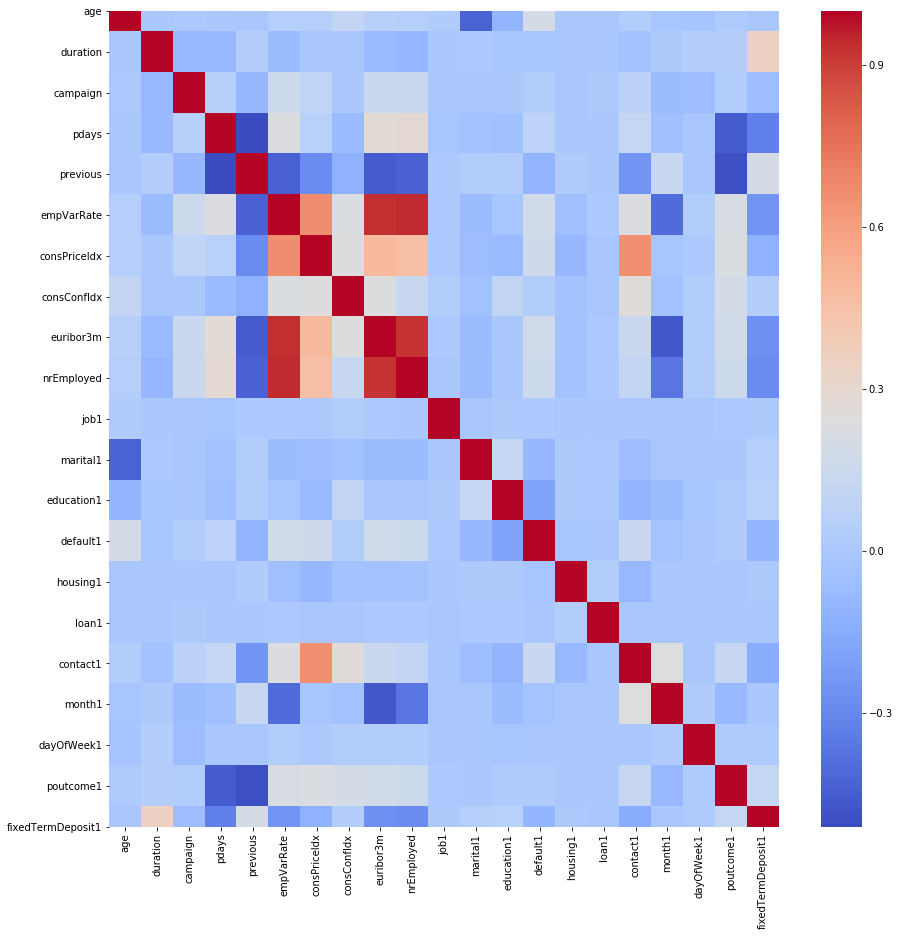

In [22]:
#Crear mapa de calor (heatmap) para analizar graficamen las posibles correlaciones entre la variable dependiente y las dependientes
def drawheatmap(bankData1):
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(bankData1.corr(method='spearman'), annot=False, cmap='coolwarm')
drawheatmap(bankData1)

Por medio del análisis de correlación, covarianza y mapa de color, se puede observar que no hay una relación lineal fuerte entre la variable dependiente (Deposito a plazo) y las diferentes variables dependientes. Estas herramientas sí nos permiten observar cierta colinearidad, es decir existe una correlación fuerte entre algunas variables predictoras.

## Exploratory Data Analysis 

## Dependent Variable: Fixed Term Deposit

C:\Users\FQ634EK\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


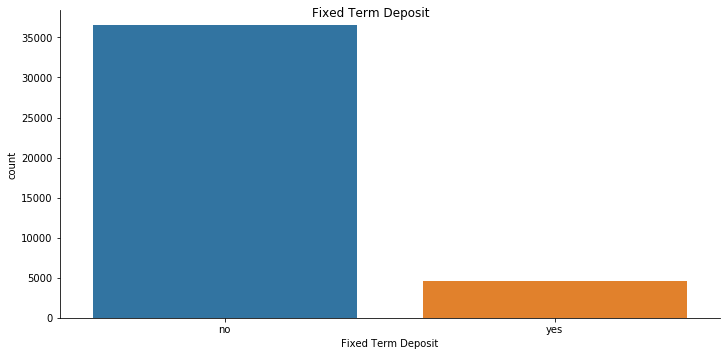

In [313]:
#Grafico de barras para variable dependiente Fixed Term Deposit
gbarFixedTermDeposit= sns.factorplot('fixedTermDeposit', data=bankData1, kind='count', aspect=2)
gbarFixedTermDeposit.fig.suptitle('Fixed Term Deposit')
gbarFixedTermDeposit.set_xlabels('Fixed Term Deposit')

In [314]:
#Agrupar y contabilizar por Fixed Term Deposit
bankData1.groupby('fixedTermDeposit')['fixedTermDeposit'].count()

fixedTermDeposit
no     36548
yes     4640
Name: fixedTermDeposit, dtype: int64

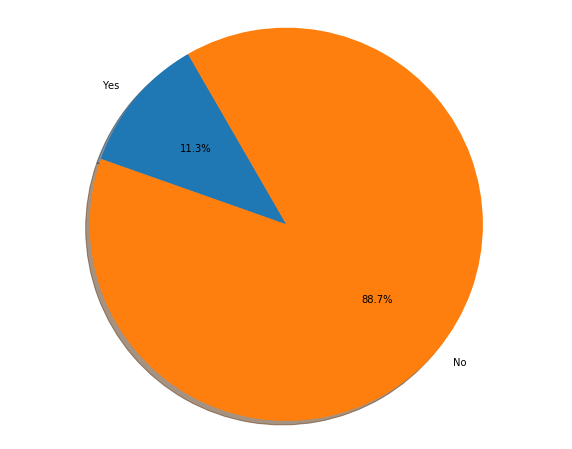

In [315]:
#Grafico de proporciones para Fixed Term Deposit
labels = 'Yes', 'No'
sizes = [4640,36548]
fig1, DefaultDepositProp = plt.subplots()
DefaultDepositProp.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
DefaultDepositProp.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Se puede observar una tasa baja de aceptación de los depositos a plazo, 11% vs una tasa de rechazo de 89%. Lo anterior justifica la necesidad de optimizar la focalización en torno a estrategias de marketing más efectivas.

## Independent Variable: Education

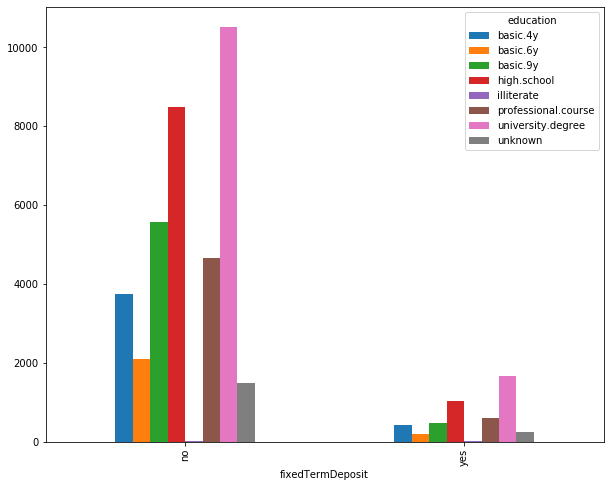

In [31]:
#Grafico de barras para nivel academico
plotEdu = pd.crosstab(index=bankData1['fixedTermDeposit'],
            columns=bankData1['education']
                  ).plot(kind='bar', stacked=False)

In [32]:
#Agrupar y contabilizar por Fixed Term Deposit y Education
eduFrec = pd.crosstab(bankData1['education'], bankData1['fixedTermDeposit'])
eduFrec

fixedTermDeposit,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [33]:
#Proporcion por Fixed Term Deposit y Education
eduProp=bankData1.groupby("education")['fixedTermDeposit'].value_counts(normalize=True).unstack()
eduProp

fixedTermDeposit,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


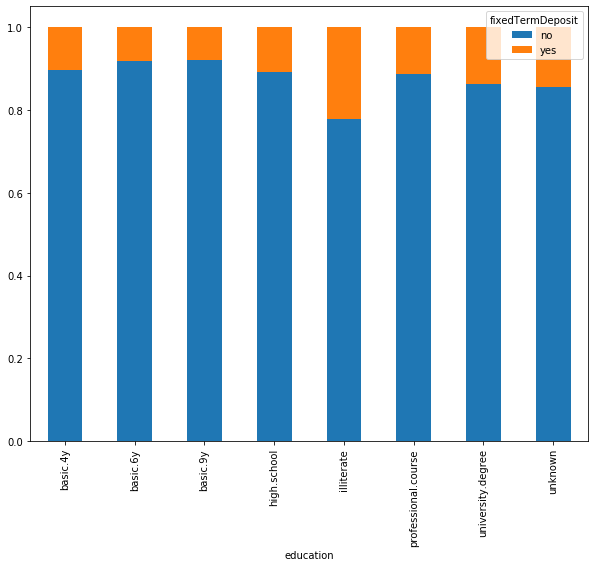

In [34]:
#Grafico de barras
eduProp.plot(kind='bar', stacked='True')

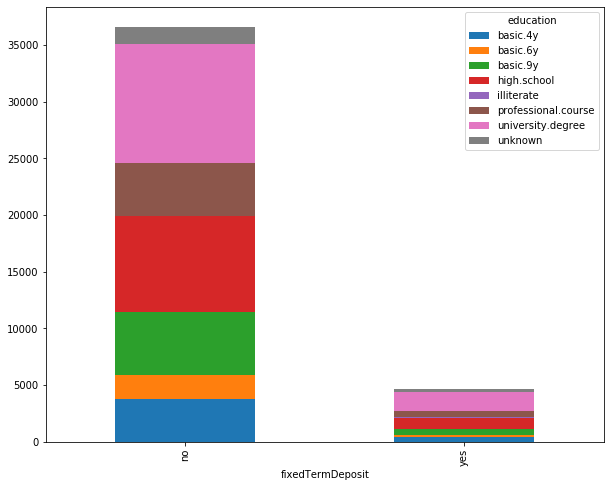

In [35]:
#Grafico de barras
plotEdu1 = pd.crosstab(index=bankData1['fixedTermDeposit'],
            columns=bankData1['education']
                  ).plot(kind='bar', stacked=True)

In [36]:
#Prueba de indepedencia Chi Cuadrado
eduTest= rp.crosstab(bankData1['education'], bankData1['fixedTermDeposit'], prop= 'col', test= 'chi-square')  
eduTest

(                    fixedTermDeposit                
                                   no     yes     All
 education                                           
 basic.4y                       10.26    9.22   10.14
 basic.6y                        5.76    4.05    5.56
 basic.9y                       15.25   10.19   14.68
 high.school                    23.21   22.22   23.10
 illiterate                      0.04    0.09    0.04
 professional.course            12.72   12.82   12.73
 university.degree              28.72   35.99   29.54
 unknown                         4.05    5.41    4.20
 All                           100.00  100.00  100.00,
                 Chi-square test   results
 0  Pearson Chi-square ( 7.0) =   193.1059
 1                    p-value =     0.0000
 2                 Cramer's V =     0.0685)

Graficamente se observa una diferencia significativa en la tasa de aceptación del deposito dependiendo del nivel educativo. Complementariamente a los graficos, la prueba de hipotesis chi nos muestra que hay una dependencia significativa entre la variable educación y la variable a predecir. 
Aquellos clientes con grados de university y unknown son los que muestran proporcionalmente mayor aceptación a los depositos a plazo con porcentajes de 14% aproximadamente.

## Independent Variable:Contact Method

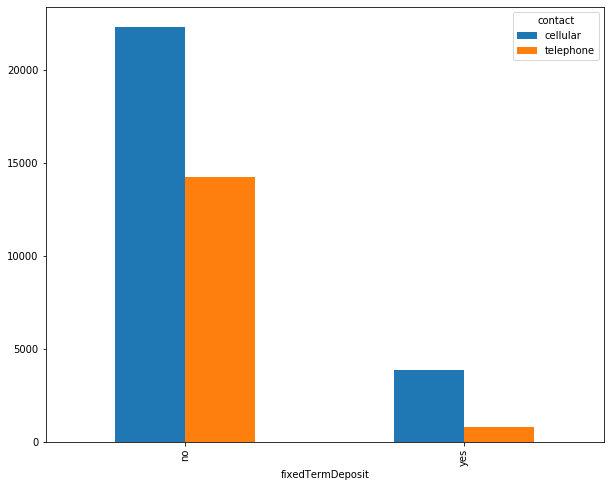

In [66]:
#Grafico de barras para metodo de contacto
plotJob = pd.crosstab(index=bankData1['fixedTermDeposit'],
            columns=bankData1['contact']
                  ).plot(kind='bar', stacked=False)

In [38]:
#Agrupar y contabilizar por Contact Method
metFrec = pd.crosstab(bankData1['contact'], bankData1['fixedTermDeposit'])
metFrec

fixedTermDeposit,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [39]:
#Proporcion por Fixed Term Deposit y Education
metProp=bankData1.groupby("contact")['fixedTermDeposit'].value_counts(normalize=True).unstack()
metProp

fixedTermDeposit,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


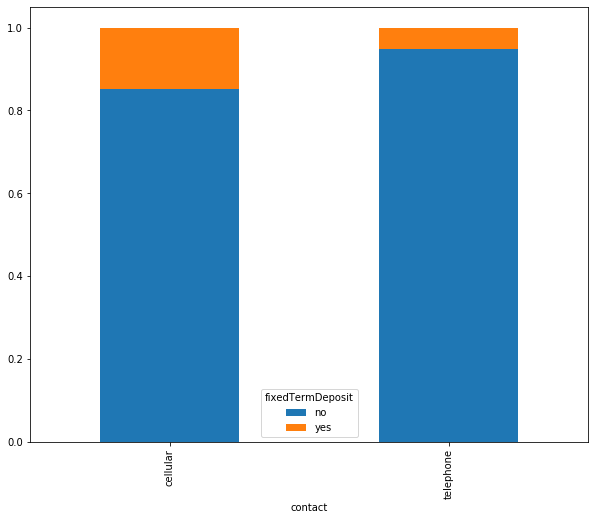

In [361]:
#Grafico de barras
metProp.plot(kind='bar', stacked='True')

In [41]:
#Prueba de indepedencia Chi Cuadrado
metTest= rp.crosstab(bankData1['contact'], bankData1['fixedTermDeposit'], prop= 'col', test= 'chi-square')  
metTest

(          fixedTermDeposit                
                         no     yes     All
 contact                                   
 cellular             60.99   83.04   63.47
 telephone            39.01   16.96   36.53
 All                 100.00  100.00  100.00,
                 Chi-square test   results
 0  Pearson Chi-square ( 1.0) =   863.2691
 1                    p-value =     0.0000
 2               Cramer's phi =     0.1448)

La mayoría de los clientes se contactan por medio de celular. Además proporcionalmente un 15% de las personas que se contactan por celular aceptan el deposito a plazo mientras que un 5% lo hacen por teléfono.

## Independent Variable: Weekday

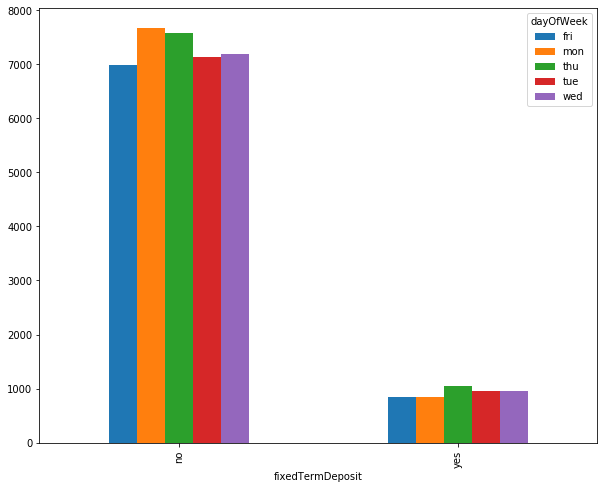

In [67]:
#Grafico de barras para día de la semana
plotJob = pd.crosstab(index=bankData1['fixedTermDeposit'],
            columns=bankData1['dayOfWeek']
                  ).plot(kind='bar', stacked=False)

In [43]:
#Agrupar y contabilizar por Contact Method
dayFrec = pd.crosstab(bankData1['dayOfWeek'], bankData1['fixedTermDeposit'])
dayFrec

fixedTermDeposit,no,yes
dayOfWeek,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [44]:
#Proporcion por Fixed Term Deposit y Education
dayProp=bankData1.groupby("dayOfWeek")['fixedTermDeposit'].value_counts(normalize=True).unstack()
dayProp

fixedTermDeposit,no,yes
dayOfWeek,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


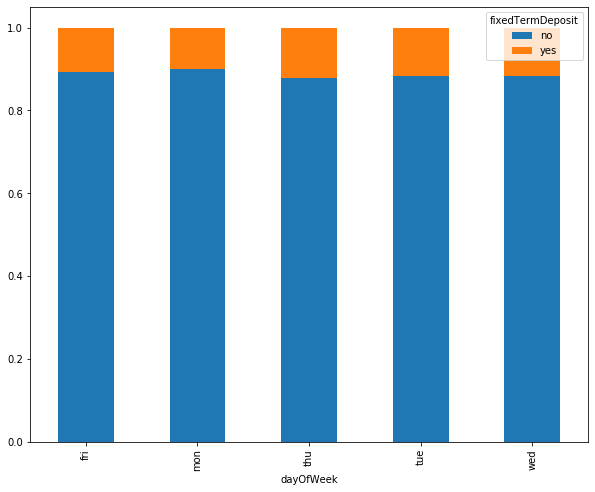

In [45]:
#Grafico de barras
dayProp.plot(kind='bar', stacked='True')

In [362]:
#Prueba de indepedencia Chi Cuadrado
dayTest= rp.crosstab(bankData1['dayOfWeek'], bankData1['fixedTermDeposit'], prop= 'col', test= 'chi-square')  
dayTest

(          fixedTermDeposit                
                         no     yes     All
 dayOfWeek                                 
 fri                  19.10   18.23   19.00
 mon                  20.98   18.25   20.67
 thu                  20.73   22.52   20.94
 tue                  19.53   20.54   19.64
 wed                  19.66   20.45   19.75
 All                 100.00  100.00  100.00,
                 Chi-square test  results
 0  Pearson Chi-square ( 4.0) =   26.1449
 1                    p-value =    0.0000
 2                 Cramer's V =    0.0252)

In [344]:
#Prueba de proporciones
countday= np.array([846,847,1045,953,949])
nobsday = np.array([8514,8090,8134,8623,7827])
statsmodels.stats.proportion.proportions_chisquare_allpairs(countday, nobsday, multitest_method='hs')

Gráficamente no se observa una diferencia significativa en la tasa de aceptación del deposito dependiendo del día de la semana en que se contactan a las personas. En promedio la aceptación de depositos a plazo diaria es de un 11%. Complementariamente a los gráficos, la prueba de hipótesis chi realizada nos muestra que con nivel de confianza del 95% hay una dependencia significativa entre la variable día y la variable a predecir.

## Independent Variable: Month

Text(0.5, 0.98, 'Month')

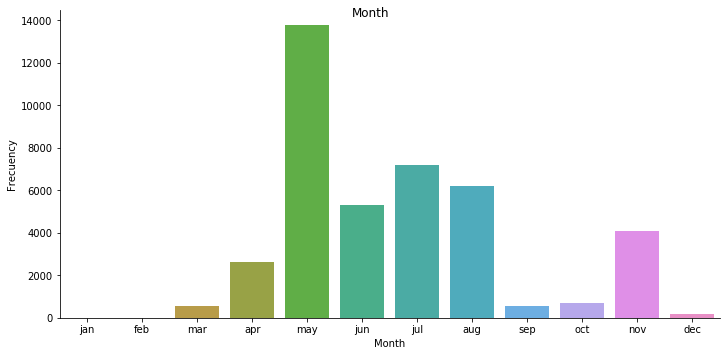

In [47]:
#Grafico de barras para mes
gbarMonth= sns.factorplot('month', data=bankData1, kind='count', aspect=2, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
gbarMonth.set_xlabels('Month')
gbarMonth.set_ylabels('Frecuency')
gbarMonth.fig.suptitle('Month')

In [48]:
#Agrupar y contabilizar por mes
monthFrec = pd.crosstab(bankData1['month'], bankData1['fixedTermDeposit'])
monthFrec

fixedTermDeposit,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [317]:
bankData1.groupby("month")['fixedTermDeposit'].value_counts(normalize=True).unstack()

fixedTermDeposit,no,yes
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


El mes donde se realizan más llamadas es mayo, sin embargo este mes es el que muestra una de las tasas de aceptación más bajas con un 6%. Proporcionalmente los meses de marzo, septiembre, octubre y diciembre son los que proporcionalmente muestran mejores tasas de aceptación por lo que sería importante aumentar el volumen de llamadas durante estos meses.

## Independent Variable: Marital Status

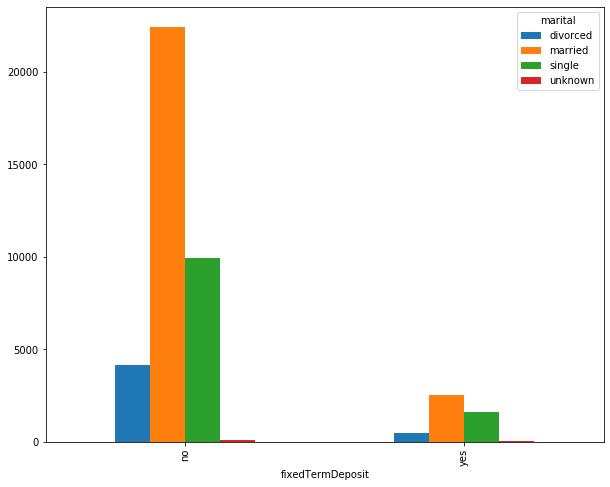

In [68]:
#Grafico de barras para estatus civil
plotJob = pd.crosstab(index=bankData1['fixedTermDeposit'],
            columns=bankData1['marital']
                  ).plot(kind='bar', stacked=False)

In [50]:
#Agrupar y contabilizar por Fixed Term Deposit y Marital
marFrec = pd.crosstab(bankData1['marital'], bankData1['fixedTermDeposit'])
marFrec

fixedTermDeposit,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [51]:
#Proporcion por Fixed Term Deposit y Marital
marProp=bankData1.groupby("marital")['fixedTermDeposit'].value_counts(normalize=True).unstack()
marProp


fixedTermDeposit,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


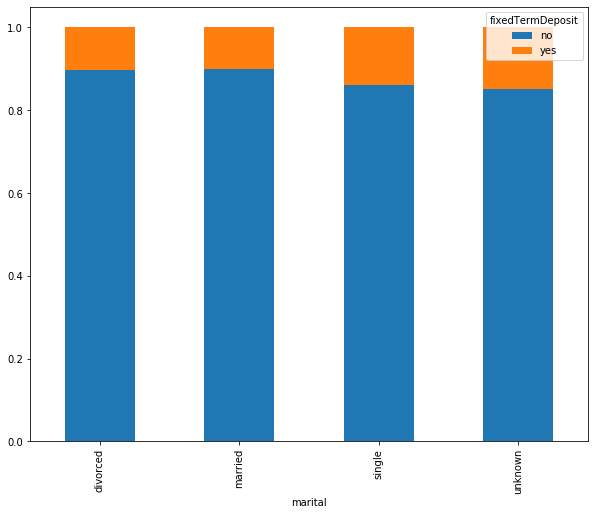

In [52]:
#Grafico de barras
marProp.plot(kind='bar', stacked='True')

In [54]:
#Prueba de indepedencia Chi Cuadrado
dayTest= rp.crosstab(bankData1['marital'], bankData1['fixedTermDeposit'], prop= 'col', test= 'chi-square')  
dayTest

(         fixedTermDeposit                
                        no     yes     All
 marital                                  
 divorced            11.32   10.26   11.20
 married             61.28   54.57   60.52
 single              27.22   34.91   28.09
 unknown              0.19    0.26    0.19
 All                100.00  100.00  100.00,
                 Chi-square test   results
 0  Pearson Chi-square ( 3.0) =   122.6552
 1                    p-value =     0.0000
 2                 Cramer's V =     0.0546)

Gráficamente se visualiza que las personas casadas son a las que se contactan con mayor frecuencia, sin embargo los clientes solteros y estatus desconocido son los que proporcionalmente mostraron mayor tasa de aceptación de los depositos a plazo comparado con los casados, 14% y 15% vs 10% respectivamente. Complementariamente a los gráficos, la prueba de hipótesis chi nos muestra con un nivel de confianza del 95% que hay una dependencia significativa entre la variable estatus civil y la variable a predecir.

## Independent Variable: Age

Text(0.5, 0.98, 'AgeStatus')

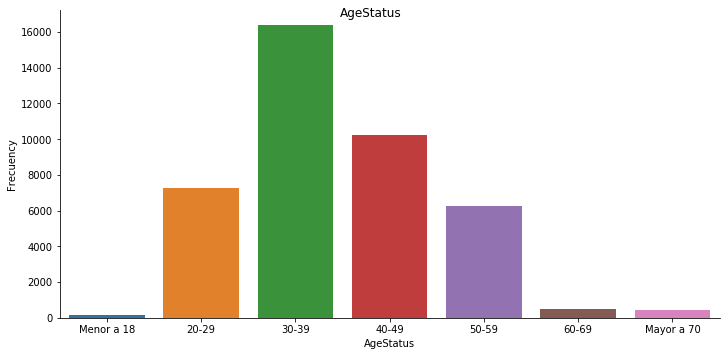

In [55]:
#Grafico de barras para edad
gbarAgeStatus= sns.factorplot('ageRange', data=bankData1, kind='count', aspect=2)
gbarAgeStatus.set_xlabels('AgeStatus')
gbarAgeStatus.set_ylabels('Frecuency')
gbarAgeStatus.fig.suptitle('AgeStatus')

In [56]:
#Agrupar y contabilizar por Fixed Term Deposit y Age
ageFrec = pd.crosstab(bankData1['ageRange'], bankData1['fixedTermDeposit'])
ageFrec

fixedTermDeposit,no,yes
ageRange,,
Menor a 18,83,57
20-29,6176,1067
30-39,14788,1597
40-49,9403,837
50-59,5602,668
60-69,276,212
Mayor a 70,220,202


In [57]:
#Proporcion por Fixed Term Deposit y Age
ageProp=bankData1.groupby("ageRange")['fixedTermDeposit'].value_counts(normalize=True).unstack()
ageProp

fixedTermDeposit,no,yes
ageRange,,
Menor a 18,0.592857,0.407143
20-29,0.852685,0.147315
30-39,0.902533,0.097467
40-49,0.918262,0.081738
50-59,0.893461,0.106539
60-69,0.565574,0.434426
Mayor a 70,0.521327,0.478673


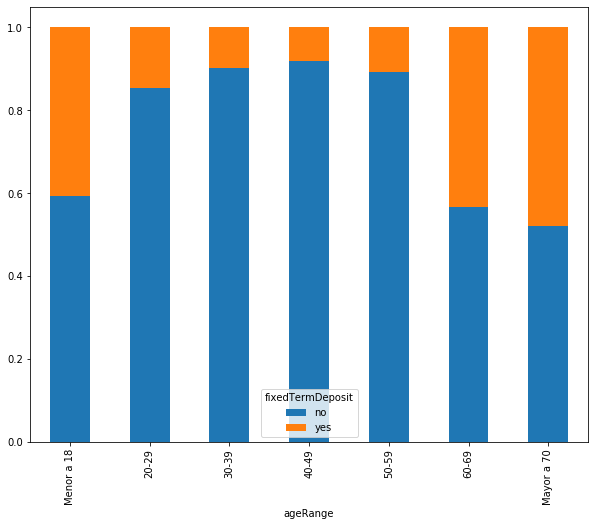

In [58]:
#Grafico de barras
ageProp.plot(kind='bar', stacked='True')

Visualmente se observa que el banco se ha enfocado en contactar mayoritariamente a las personas en el rango de 30-39, sin embargo proporcionalmente los clientes mayores a 70 y entre 60-69 son los que muestran mejores tasas de aceptación, 47% y 43% respectivamente.

## Independent Variabe: Job 

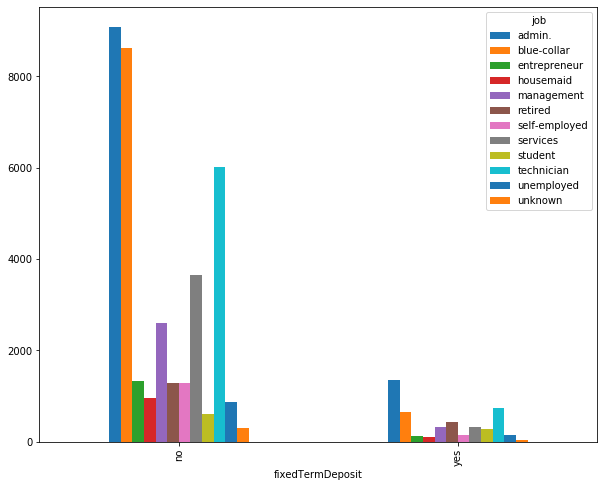

In [59]:
#Grafico de barras para tipo de trabajo
plotJob = pd.crosstab(index=bankData1['fixedTermDeposit'],
            columns=bankData1['job']
                  ).plot(kind='bar', stacked=False)

In [60]:
#Agrupar y contabilizar por Fixed Term Deposit y Job
jobFrec = pd.crosstab(bankData1['job'], bankData1['fixedTermDeposit'])
jobFrec

fixedTermDeposit,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [61]:
#Proporcion por Fixed Term Deposit y Job
jobProp=bankData1.groupby("job")['fixedTermDeposit'].value_counts(normalize=True).unstack()
jobProp


fixedTermDeposit,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


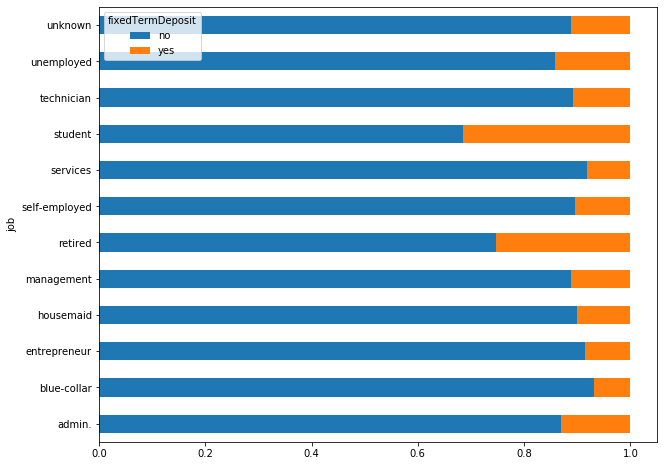

In [363]:
#Grafico de barras
jobProp.plot(kind='barh', stacked='True')

A pesar de que los clientes bajo un perfil de estudiante y retirado no están entre los más contactados, proporcionalmente sus tasas de aceptación son de las más altas con un 31% y 25% respectivamente.

## Independent Variable: Number of contacts

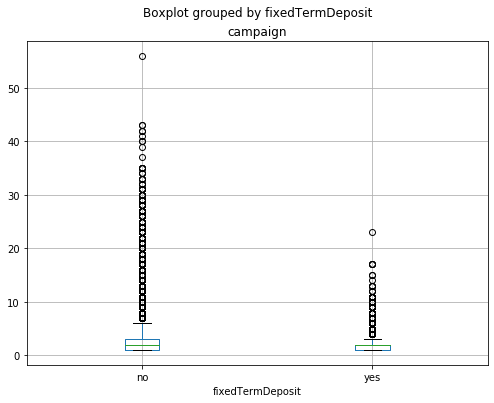

In [95]:
#Boxplot para entender distribución de los datos por # de llamadas
bankData1.boxplot('campaign', by='fixedTermDeposit', figsize=(8, 6))

In [340]:
mod=ols('campaign ~ fixedTermDeposit', data=bankData1).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

                       df         sum_sq      mean_sq           F  \
fixedTermDeposit      1.0    1391.562959  1391.562959  182.156673   
Residual          41186.0  314635.259513     7.639374         NaN   

                        PR(>F)  
fixedTermDeposit  2.007780e-41  
Residual                   NaN  


El boxplot de # Número de veces que una persona fue contactada vs la variable dependiente, muestra una diferencia significativa en las distribuciones de los datos y se puede visualizar que aquellos que aceptaron el deposito a plazo fueron contactados menos veces en comparación con los que lo rechazaron. Complementariamente se realiza una ANOVA de un factor y se concluye con un 95% de confianza que las medias en el # de contactos de ambos conjuntos (aceptación vs rechazo) difieren entre sí.

## Independent Variable: Duration

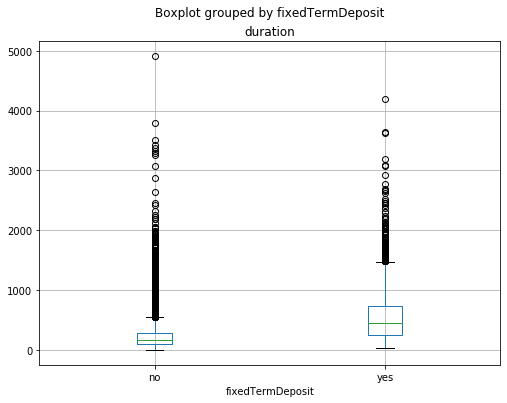

In [96]:
#Boxplot para entender distribución de los datos por duracion de llamadas
bankData1.boxplot('duration', by='fixedTermDeposit', figsize=(8, 6))

In [359]:
mod1=ols('duration~fixedTermDeposit', data=bankData1).fit()
aov_table1=sm.stats.anova_lm(mod1,typ=1)
print(aov_table1)

                       df        sum_sq       mean_sq            F  PR(>F)
fixedTermDeposit      1.0  4.547710e+08  4.547710e+08  8094.101634     0.0
Residual          41186.0  2.314055e+09  5.618548e+04          NaN     NaN


El boxplot de Duración de la llamada vs la variable dependiente Depositos a plazo, muestra una diferencia significativa en las distribuciones de los datos y se puede visualizar que aquellos que aceptaron el deposito a plazo registraron duraciones de llamadas mayores con respecto a los que rechazaron el deposito. Complementariamente se realiza una ANOVA de un factor y se concluye con un 95% de confianza que las medias en el # de contactos de ambos conjuntos (aceptación vs rechazo) difieren entre sí.

# Experiment 1

Se toman en cuenta todas aquellas variables/atributos disponibles en el conjunto de datos. 
En cada uno de los expermientos se realiza la selección y reeingeniería de variables, división del conjunto de datos en 70-30 para su entrenamiento y testeo, entrenamiento del modelo mediate la aplicación de 4 algoritmos diferentes de clasificación y el testeo de los modelos.
Para este experimento, se evalua el desempeño del modelo mediante la aplicación de diferentes algoritmos tales como Decision Tree, Super Vector Machine, Knn y Random Forest.

## Features Selection-Experiment 1

Se toman en cuenta todas aquellas variables/atributos disponibles en el conjunto de datos y se realiza un trabajo de reingeniería de variables en aquellas variables independientes de tipo categoricas.

In [182]:
#Visualizar las columnas disponibles
bankData1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'dayOfWeek', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empVarRate', 'consPriceIdx', 'consConfIdx',
       'euribor3m', 'nrEmployed', 'fixedTermDeposit', 'ageRange',
       'durationRange', 'job1', 'marital1', 'education1', 'default1',
       'housing1', 'loan1', 'contact1', 'month1', 'dayOfWeek1', 'poutcome1',
       'fixedTermDeposit1'],
      dtype='object')

In [183]:
#Seleccionar variables del dataset
AllFeatures=bankData1.loc[ : , ['age','duration','campaign', 'pdays',
       'previous', 'empVarRate', 'consPriceIdx', 'consConfIdx',
       'euribor3m', 'nrEmployed', 'job1', 'marital1', 'education1', 'default1',
       'housing1', 'loan1', 'contact1', 'month1', 'dayOfWeek1', 'poutcome1']]
AllFeatures.head()

,age,duration,campaign,pdays,previous,empVarRate,consPriceIdx,consConfIdx,euribor3m,nrEmployed,job1,marital1,education1,default1,housing1,loan1,contact1,month1,dayOfWeek1,poutcome1
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1


In [184]:
#Definir la variable a predecir
depVar = bankData1['fixedTermDeposit1']

## Training and testing datasets-Experiment 1

Se divide el conjunto de datos en 70% para fines de entrenamiento y el 30% restante para fines de testeo.

In [185]:
#Variables independientes Training Set
XTrain = (AllFeatures[:])

In [186]:
#Variable Dependiente Training Set
YTrain = depVar[:]
YTrainCount = len(YTrain.index)

In [187]:
#Variables Independientes Testing Set
XTest = AllFeatures[-100:]
XTestCount = len(XTest.index)

In [188]:
# Variable Dependiente Testing Set.Y Truth
YTest = depVar[-100:]
YTestCount = len(YTest.index)

In [189]:
#Cross Validation
XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.3)

In [190]:
XTrain.shape, XTest.shape

((28831, 20), (12357, 20))

## Predictive Models -Experiment 1

Se prueba el set de datos con 4 clasificadores diferentes y se compara sus métricas de desempeño. Para cada uno de estos clasificadores aplicaremos entrenamiento, validación cruzada, predicciones y analizaremos la matriz de confusión.

## Decision Tree

In [191]:
# Decision Tree
modelDecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=10)

In [192]:
#Training
modelDecisionTree.fit(XTrain,YTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [193]:
#Cross Validation
print(cross_val_score(modelDecisionTree, XTrain, YTrain, cv=10, n_jobs=2)) 
modelDecisionTree.score(XTrain,YTrain)

[0.9018724  0.91016302 0.91605966 0.90981616 0.89836975 0.91189733
 0.90808186 0.91050989 0.91016302 0.90218522]


0.9423537164857272

In [194]:
#Testing
predictionDecisionTree= modelDecisionTree.predict(XTest)

In [203]:
#Confusion Matrix
pd.crosstab(YTest,predictionDecisionTree, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10402,516,10918
1,645,794,1439
All,11047,1310,12357


In [196]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionDecisionTree,target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.95      0.95     10918
         Yes       0.61      0.55      0.58      1439

    accuracy                           0.91     12357
   macro avg       0.77      0.75      0.76     12357
weighted avg       0.90      0.91      0.90     12357



## Super Vector Machine

In [197]:
#SVM
modelSVM=svm.SVC(C=1, kernel='rbf')

In [198]:
#Training
modelSVM.fit(XTrain,YTrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [199]:
#Cross Validation
print(cross_val_score(modelSVM, XTrain, YTrain, cv=10, n_jobs=2)) 
modelSVM.score(XTrain,YTrain)

[0.89875173 0.90183836 0.89802289 0.89906348 0.89420742 0.89871661
 0.89767603 0.89559487 0.90183836 0.8997572 ]


0.8985813880892095

In [200]:
#Testing
predictionSVM= modelSVM.predict(XTest)

In [202]:
#Confusion Matrix
pd.crosstab(YTest,predictionSVM, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10745,173,10918
1,1117,322,1439
All,11862,495,12357


In [204]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionSVM,target_names=target_names))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94     10918
         Yes       0.65      0.22      0.33      1439

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.87     12357



## KNN

In [205]:
#KNN
modelKnn = KNeighborsClassifier(n_jobs=2, n_neighbors=13, weights='uniform', p=1)

In [206]:
#Training
modelKnn.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=13, p=1,
                     weights='uniform')

In [207]:
#Cross Validation
print(cross_val_score(modelKnn, XTrain, YTrain, cv=10, n_jobs=2)) 
modelKnn.score(XTrain,YTrain)

[0.90499307 0.90565383 0.91155047 0.91050989 0.90183836 0.91293791
 0.91189733 0.91120361 0.90565383 0.91085675]


0.919981963858347

In [208]:
#Testing
predictionKnn= modelKnn.predict(XTest)

In [209]:
#Confusion Matrix
pd.crosstab(YTest,predictionKnn, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10498,420,10918
1,730,709,1439
All,11228,1129,12357


In [210]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionKnn,target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.96      0.95     10918
         Yes       0.63      0.49      0.55      1439

    accuracy                           0.91     12357
   macro avg       0.78      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



# Random Forest

In [211]:
#RF
modelRF= RandomForestClassifier(max_depth=7, n_estimators=70, n_jobs=2, criterion='gini')

In [212]:
#Training
modelRF.fit(XTrain,YTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [213]:
#Cross Validation
print(cross_val_score(modelRF, XTrain, YTrain, cv=10, n_jobs=2)) 
modelRF.score(XTrain,YTrain)

[0.91262136 0.90842872 0.9094693  0.91363163 0.90669442 0.91155047
 0.90912244 0.91120361 0.90981616 0.907735  ]


0.9192188963268704

In [214]:
#Testing
predictionRf= modelRF.predict(XTest)

In [216]:
#Confusion Matrix
pd.crosstab(YTest,predictionRf, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10758,160,10918
1,987,452,1439
All,11745,612,12357


In [217]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionRf,target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     10918
         Yes       0.74      0.31      0.44      1439

    accuracy                           0.91     12357
   macro avg       0.83      0.65      0.70     12357
weighted avg       0.90      0.91      0.89     12357



## Experiment 1- Model Comparison

In [236]:
#Metricas por modelo
accDt = accuracy_score(YTest, predictionDecisionTree)
accKnn = accuracy_score(YTest, predictionKnn)
accSVM = accuracy_score(YTest, predictionSVM)
accRf = accuracy_score(YTest, predictionRf)
preDt = precision_score(YTest, predictionDecisionTree)
preKnn = precision_score(YTest, predictionKnn)
preSVM = precision_score(YTest, predictionSVM)
preRf = precision_score(YTest, predictionRf)
preRf = precision_score(YTest, predictionRf)
recDt = recall_score(YTest, predictionDecisionTree)
recKnn = recall_score(YTest, predictionKnn)
recSVM = recall_score(YTest, predictionSVM)
recRf = recall_score(YTest, predictionRf)
recRf = recall_score(YTest, predictionRf)

In [237]:
acc = pd.DataFrame({'Model':['DecTree','KNN','SVM','RandomForest'],
    'Accuracy':[accDt,accKnn,accSVM,accRf],'Precision':[preDt,preKnn,preSVM,preRf],'Recall':[recDt,recKnn,recSVM,recRf]})
acc

,Model,Accuracy,Precision,Recall
0,DecTree,0.906045,0.606107,0.551772
1,KNN,0.906935,0.627989,0.492703
2,SVM,0.895606,0.650505,0.223767
3,RandomForest,0.907178,0.738562,0.314107


Para este experimento los mejores resultados se obtuvieron con el clasificador Random Forest. Importante señalar que los 4 algoritmos clasificadores mostraron medidas de desempeño muy similares.

# Experiment 2

Se toman unicamente aquellas variables/atributos que sugiere la función RFE (Recursive Feature Elimination). En cada uno de los expermientos se realiza la selección y reeingeniería de variables, división del conjunto de datos en 70-30 para su entrenamiento y testeo, entrenamiento del modelo mediate la aplicación de 4 algoritmos diferentes de clasificación y el testeo de los modelos. Para este experimento, se evalua el desempeño del modelo mediante la aplicación de diferentes clasificadores tales como Decision Tree, Super Vector Machine, Knn y Random Forest.

## Features Selection RFE-Experiment 2

Las 10 variables independientes con un efecto más significativo sobre la variable a predecir segun RFE son: ['age','duration','campaign', 'pdays','consPriceIdx', 'euribor3m', 'nrEmployed', 'job1', 'education1', 'dayOfWeek1'].

In [256]:
rfeRF=RandomForestClassifier()
rfe = RFE(rfeRF, n_features_to_select=10)
rfe.fit(AllFeatures,depVar)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False False  True  True  True  True False
  True False False False False False  True False]
[ 1  1  1  1  9  8  3  1  1  1  1  4  1 11  6  7 10  5  1  2]


In [257]:
# Variables con RFE
featuresRFE = bankData1.loc[ : , ['age','duration','campaign', 'pdays','consPriceIdx', 
       'euribor3m', 'nrEmployed', 'job1', 'education1', 'dayOfWeek1']]

featuresRFE.head()

,age,duration,campaign,pdays,consPriceIdx,euribor3m,nrEmployed,job1,education1,dayOfWeek1
0,56,261,1,999,93.994,4.857,5191.0,3,0,1
1,57,149,1,999,93.994,4.857,5191.0,7,3,1
2,37,226,1,999,93.994,4.857,5191.0,7,3,1
3,40,151,1,999,93.994,4.857,5191.0,0,1,1
4,56,307,1,999,93.994,4.857,5191.0,7,3,1


## Training and testing datasets-Experiment 2

Se divide el conjunto de datos en 70% para fines de entrenamiento y el 30% restante para fines de testeo.Se prueba el set de datos con 4 clasificadores diferentes y se compara sus métricas de desempeño. 

In [258]:
#Variables independientes Training Set
XTrain1 = (featuresRFE[:])

In [259]:
#Variable Dependiente Training Set
YTrain1 = depVar[:]

In [263]:
#Variables Independientes Testing Set
XTest1 = featuresRFE[-100:]
XTest1Count = len(XTest1.index)

In [264]:
# Variable Dependiente Testing Set.Y Truth
YTest1 = depVar[-100:]
YTest1Count = len(YTest1.index)

In [265]:
#Cross Validation
XTrain1, XTest1, YTrain1, YTest1 = train_test_split(XTrain1, YTrain1, test_size=0.3)

In [267]:
XTrain1.shape, XTest1.shape

((28831, 10), (12357, 10))

## Predictive Models -Experiment 2


 Para cada uno de estos clasificadores aplicaremos entrenamiento, validación cruzada, predicciones y analizaremos la matriz de confusión.

## Decision Tree

In [268]:
# Decision Tree
modelDecisionTree1 = DecisionTreeClassifier(criterion='gini', max_depth=10)

In [269]:
#Training
modelDecisionTree1.fit(XTrain1,YTrain1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [270]:
#Cross Validation
print(cross_val_score(modelDecisionTree1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelDecisionTree1.score(XTrain1,YTrain1)

[0.90117892 0.9094693  0.90391953 0.90391953 0.91224419 0.91189733
 0.90808186 0.91363163 0.90738814 0.91155047]


0.9387118032673164

In [271]:
#Testing
predictionDecisionTree1= modelDecisionTree1.predict(XTest1)

In [273]:
#Confusion Matrix
pd.crosstab(YTest1,predictionDecisionTree1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10505,467,10972
1,657,728,1385
All,11162,1195,12357


In [274]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionDecisionTree1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     10972
         Yes       0.61      0.53      0.56      1385

    accuracy                           0.91     12357
   macro avg       0.78      0.74      0.76     12357
weighted avg       0.90      0.91      0.91     12357



## Super Vector Machine

In [275]:
#SVM
modelSVM1=svm.SVC(C=1, kernel='rbf')

In [277]:
#Training
modelSVM1.fit(XTrain1,YTrain1)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [281]:
#Cross Validation
print(cross_val_score(modelSVM1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelSVM1.score(XTrain1,YTrain1)

[0.89355062 0.89836975 0.90322581 0.89698231 0.89663545 0.89732917
 0.89524801 0.89732917 0.90079778 0.9014915 ]


0.8981998543234713

In [282]:
#Testing
predictionSVM1= modelSVM1.predict(XTest1)

In [283]:
#Confusion Matrix
pd.crosstab(YTest1,predictionSVM1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10800,172,10972
1,1106,279,1385
All,11906,451,12357


In [286]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionSVM1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94     10972
         Yes       0.62      0.20      0.30      1385

    accuracy                           0.90     12357
   macro avg       0.76      0.59      0.62     12357
weighted avg       0.87      0.90      0.87     12357



## KNN

In [287]:
#KNN
modelKnn1 = KNeighborsClassifier(n_jobs=2, n_neighbors=13, weights='uniform', p=1)

In [288]:
#Training
modelKnn.fit(XTrain1,YTrain1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=13, p=1,
                     weights='uniform')

In [289]:
#Cross Validation
print(cross_val_score(modelKnn1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelKnn.score(XTrain1,YTrain1)

[0.90568655 0.91397849 0.90426639 0.907735   0.90079778 0.91328477
 0.91016302 0.91293791 0.91120361 0.90912244]


0.9202941278484964

In [290]:
#Testing
predictionKnn1= modelKnn.predict(XTest1)

In [292]:
#Confusion Matrix
pd.crosstab(YTest1,predictionKnn1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10576,396,10972
1,700,685,1385
All,11276,1081,12357


In [294]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionKnn1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     10972
         Yes       0.63      0.49      0.56      1385

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.75     12357
weighted avg       0.90      0.91      0.91     12357



## Random Forest

In [295]:
#RF
modelRF1= RandomForestClassifier(max_depth=7, n_estimators=70, n_jobs=2, criterion='gini')

In [296]:
#Training
modelRF.fit(XTrain1,YTrain1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [297]:
#Cross Validation
print(cross_val_score(modelRF1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelRF.score(XTrain1,YTrain1)

[0.91262136 0.91432536 0.91085675 0.90634755 0.91120361 0.91710024
 0.91259105 0.91155047 0.91120361 0.91918141]


0.9244909992716174

In [298]:
#Testing
predictionRf1= modelRF.predict(XTest1)

In [299]:
#Confusion Matrix
pd.crosstab(YTest1,predictionRf1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,10729,243,10972
1,815,570,1385
All,11544,813,12357


In [300]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionRf1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.98      0.95     10972
         Yes       0.70      0.41      0.52      1385

    accuracy                           0.91     12357
   macro avg       0.82      0.69      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [310]:
#Metricas por modelo
accDt = accuracy_score(YTest1, predictionDecisionTree1)
accKnn = accuracy_score(YTest1, predictionKnn1)
accSVM = accuracy_score(YTest1, predictionSVM1)
accRf = accuracy_score(YTest1, predictionRf1)
preDt = precision_score(YTest1, predictionDecisionTree1)
preKnn = precision_score(YTest1, predictionKnn1)
preSVM = precision_score(YTest1, predictionSVM1)
preRf = precision_score(YTest1, predictionRf1)
preRf = precision_score(YTest1, predictionRf1)
recDt = recall_score(YTest1, predictionDecisionTree1)
recKnn = recall_score(YTest1, predictionKnn1)
recSVM = recall_score(YTest1, predictionSVM1)
recRf = recall_score(YTest1, predictionRf1)
recRf = recall_score(YTest1, predictionRf1)

In [347]:
#Tabla comparativa
acc1 = pd.DataFrame({'Model':['DecTree','KNN','SVM','RandomForest'],
    'Accuracy':[accDt,accKnn,accSVM,accRf],'Precision':[preDt,preKnn,preSVM,preRf],'Recall':[recDt,recKnn,recSVM,recRf]})
acc1

,Model,Accuracy,Precision,Recall
0,DecTree,0.909039,0.609205,0.525632
1,KNN,0.911305,0.633673,0.494585
2,SVM,0.896577,0.618625,0.201444
3,RandomForest,0.914381,0.701107,0.411552


Para este experimento los mejores resultados se obtuvieron también con el clasificador Random Forest. Importante señalar que los 4 algoritmos clasificadores mostraron medidas de desempeño muy similares.

Las métricas de desempeño de Random Forest para ambos experimentos son muy similares. Por tanto se recomienda el Experimento 2 con el modelo Random Forest pues es más simple y se ejecuta más rápido. Asimismo al ser un modelo con menos variables, se facilita la tarea de manejo y almacenamiento de la información.